In [25]:
# Imports
import math
import h5py
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from PIL import Image

# 1.) Helper functions

In [26]:
# Load Dataset function
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [8]:
# Initilize initial value of w and b for parameters
def initialize_params(m):
    np.random.seed(3)
    w = np.random.randn(m, 1) * math.sqrt(2./m)
    b = 0
    return w, b

In [9]:
m = 2
w, b = initialize_params(m)
print('w = ' + str(w))
print('b = ' + str(b))

w = [[1.78862847]
 [0.43650985]]
b = 0


In [10]:
# Sigmoid
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

In [12]:
sigmoid(np.array([1, 2, 3]))

array([0.73105858, 0.88079708, 0.95257413])

# 2.) Logistic Regression

In [13]:
# Propagate
def propagate(w, b, X, Y):
    m = X.shape[1]

    # Forward Propagation
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    cost = (np.sum(Y * (-np.log(A)) + (1 - Y) * (-np.log(1 - A)))) / m

    # Backward Propagation
    db = (np.sum(A - Y)) / m
    dw = (np.dot(X, (A - Y).T)) / m
    cost = np.squeeze(cost)

    return cost, db, dw

In [14]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
cost, db, dw = propagate(w, b, X, Y)
print ("dw = " + str(dw))
print ("db = " + str(db))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [15]:
# Optimization
def optimize(w, b, X, Y, num_iter, lr, pc = False):
    costs = []
    for i in range(num_iter):
        cost, db, dw = propagate(w, b, X, Y)

        w = w - lr * dw
        b = b - lr * db

        if(i % 100 == 0):
            costs.append(cost)
        if pc and i % 100 == 0:
            print("cost after iteration %i:%f" %(i, cost))

    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}

    return params, grads, costs

In [17]:
params, grads, costs = optimize(w, b, X, Y, num_iter= 1000, lr = 0.009, pc = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
costs

w = [[-0.64226437]
 [-0.43498153]]
b = 2.2025594747904087
dw = [[ 0.06282959]
 [-0.01416124]]
db = -0.04847508604218078


[5.801545319394553,
 1.055933444321741,
 0.3783029181411113,
 0.36359491114822834,
 0.3562416177005574,
 0.3492096333906643,
 0.342420465089162,
 0.33586028201015944,
 0.32951704926683034,
 0.32337975629352356]

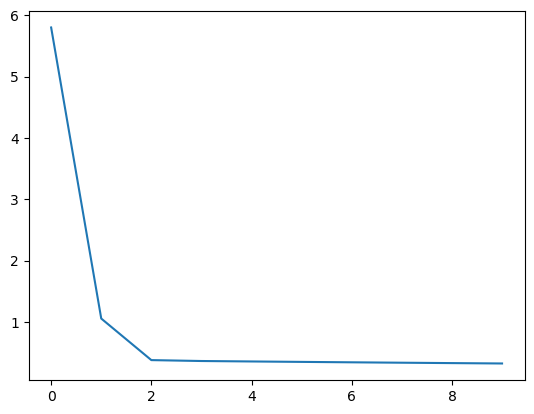

In [18]:
plt.plot(costs)

In [21]:
# Predict
def predict(w, b, X):
    m = X.shape[1]
    w = w.reshape(X.shape[0], 1)
    y_predictions = np.zeros((1, m))
    y_hat = sigmoid(np.dot(w.T, X) + b)
    y_predictions = (y_hat >= 0.5) * 1.0
    return y_predictions

In [22]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [23]:
# Model function to combine everything in a model
def model(X_train, Y_train, X_test, Y_test, num_iter = 2000, lr = 0.5, pc = False):
    w, b = initialize_params(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iter, lr, pc)
    w = params['w']
    b = params['b']
    Y_predict_train = predict(w, b, X_train)
    Y_predict_test = predict(w, b, X_test)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_predict_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_predict_test - Y_test)) * 100)) 


    d = {"costs": costs,
         "Y_prediction_test": Y_predict_test, 
         "Y_prediction_train" : Y_predict_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : lr,
         "num_iterations": num_iter}

    return d

In [27]:
# Train and test from here onwards
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [28]:
m_train = train_set_x_orig.shape[0]
m_test =  test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [29]:
# Reshape the data
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [30]:
# Standardize the data
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255
print ("sanity check after reshaping: " + str(train_set_x[0:5,0]))

sanity check after reshaping: [0.06666667 0.12156863 0.21960784 0.08627451 0.12941176]


In [35]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iter=55000, lr=0.005, pc=True)

cost after iteration 0:0.740317
cost after iteration 100:0.635345
cost after iteration 200:0.480889
cost after iteration 300:0.376887
cost after iteration 400:0.331898
cost after iteration 500:0.303204
cost after iteration 600:0.279486
cost after iteration 700:0.259437
cost after iteration 800:0.242198
cost after iteration 900:0.227175
cost after iteration 1000:0.213939
cost after iteration 1100:0.202171
cost after iteration 1200:0.191627
cost after iteration 1300:0.182118
cost after iteration 1400:0.173494
cost after iteration 1500:0.165633
cost after iteration 1600:0.158437
cost after iteration 1700:0.151824
cost after iteration 1800:0.145724
cost after iteration 1900:0.140080
cost after iteration 2000:0.134842
cost after iteration 2100:0.129969
cost after iteration 2200:0.125423
cost after iteration 2300:0.121173
cost after iteration 2400:0.117191
cost after iteration 2500:0.113453
cost after iteration 2600:0.109938
cost after iteration 2700:0.106625
cost after iteration 2800:0.1035

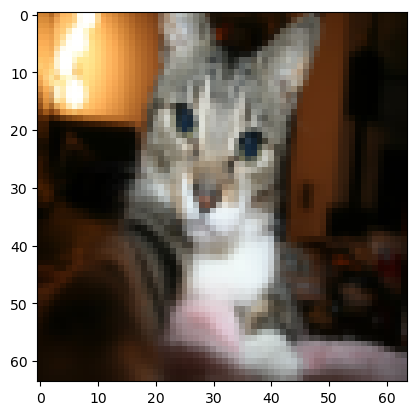

In [36]:
# Example of a picture that was wrongly classified.
index = 25
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))

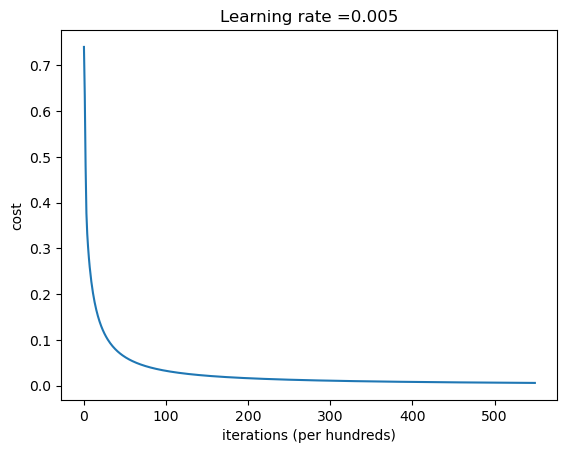

In [37]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

y = 1.0, your algorithm predicts a "cat" picture.


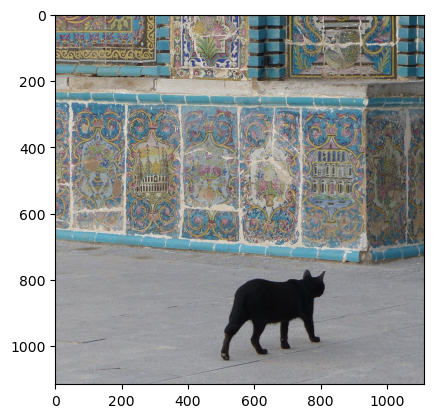

In [40]:
my_image = 'cat_in_iran.jpg'

fname = 'images/' + my_image
image = imageio.imread(fname)
my_image = (np.array(Image.fromarray(imageio.imread(fname)).resize((num_px, num_px)))).reshape((1, num_px*num_px*3)).T
my_image = my_image / 255
my_predicted_image = predict(d['w'], d['b'], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

y = 1.0, your algorithm predicts a "cat" picture.


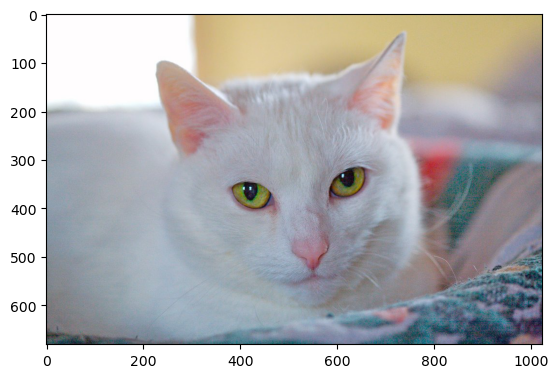

In [41]:
my_image = 'my_image2.jpg'

fname = 'images/' + my_image
image = imageio.imread(fname)
my_image = (np.array(Image.fromarray(imageio.imread(fname)).resize((num_px, num_px)))).reshape((1, num_px*num_px*3)).T
my_image = my_image / 255
my_predicted_image = predict(d['w'], d['b'], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

y = 0.0, your algorithm predicts a "non-cat" picture.


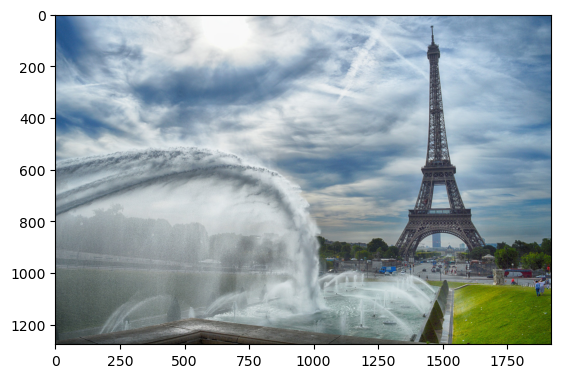

In [43]:
my_image = 'my_image.jpg'

fname = 'images/' + my_image
image = imageio.imread(fname)
my_image = (np.array(Image.fromarray(imageio.imread(fname)).resize((num_px, num_px)))).reshape((1, num_px*num_px*3)).T
my_image = my_image / 255
my_predicted_image = predict(d['w'], d['b'], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

y = 1.0, your algorithm predicts a "cat" picture.


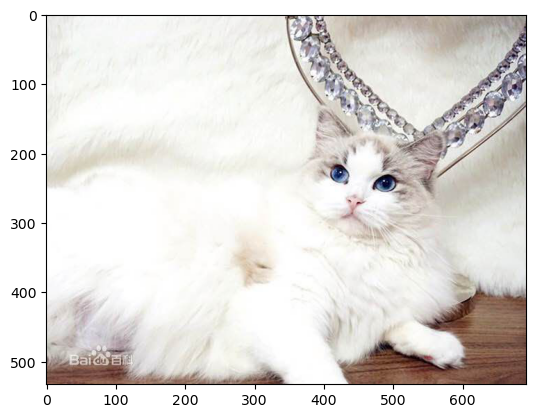

In [44]:
my_image = '123.jpg'

fname = 'images/' + my_image
image = imageio.imread(fname)
my_image = (np.array(Image.fromarray(imageio.imread(fname)).resize((num_px, num_px)))).reshape((1, num_px*num_px*3)).T
my_image = my_image / 255
my_predicted_image = predict(d['w'], d['b'], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")